# Objective
We aim to analyze and optimize cellular network performance by understanding relationships among various metrics, predicting signal strength, and identifying factors that impact user experience.

# Load and Explore the Dataset
Data Preview
Columns:

1. Timestamp: Time of data recording.
2. Signal Strength (dBm): Strength of the network signal.
3. SNR: Signal-to-Noise Ratio indicating signal clarity.
4. Call Duration (s): Duration of the call in seconds.
5. Environment: Contextual environment (Urban/Rural).
6. Attenuation (dB): Signal loss due to distance or obstacles.
7. Distance to Tower (km): Distance between the device and the cellular tower.
8. Tower ID: Identifier for the tower.
9. User ID: Identifier for the user.
10. Call Type: Type of call (Voice/Data).
11. Incoming/Outgoing: Direction of the call.

In [24]:
#Load and Inspect Data
import pandas as pd
import numpy as np

# Load dataset
file_path = "train.csv"  # replace with the actual path to the downloaded file
data = pd.read_csv(file_path)
df = data
# Check the first few rows of the dataset
print(data.head())

# Overview of dataset
print(data.info())

# Summary statistics
print(data.describe())


# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values (example: fill NaN in 'SNR' with mean)
data['SNR']=data['SNR'].mean()
# Convert categorical data to consistent format
data['Environment'] = data['Environment'].str.lower()

             Timestamp  Signal Strength (dBm)        SNR  Call Duration (s)  \
0  2022-01-03 17:46:13             -84.119763  25.940082        1713.800550   
1  2022-01-04 17:29:31             -87.806131  15.937354         345.371848   
2  2022-01-05 17:14:01            -116.575176  14.709384         259.285043   
3  2022-01-06 16:02:29             -82.961183  21.727165         357.974004   
4  2022-01-07 22:19:17             -85.012574  26.058158         398.006716   

  Environment  Attenuation  Distance to Tower (km)  Tower ID  User ID  \
0       urban    14.690438                2.243176         5       25   
1        home     6.213698                5.002566         3       22   
2        open     4.494415                8.705974         2        5   
3        home     7.619957                7.427025         5       33   
4       urban    10.655159                0.612071         5        8   

  Call Type Incoming/Outgoing  
0      data          incoming  
1     voice          i

# Exploratory Data Analysis (EDA)

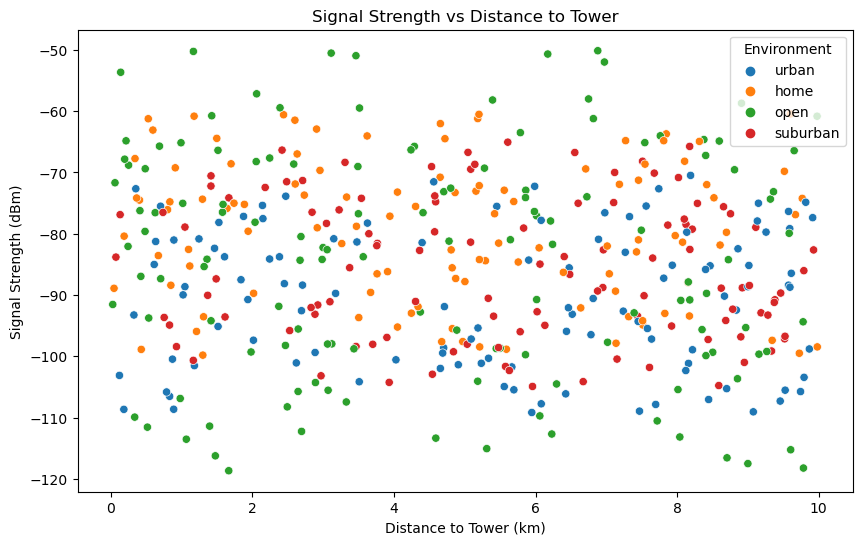

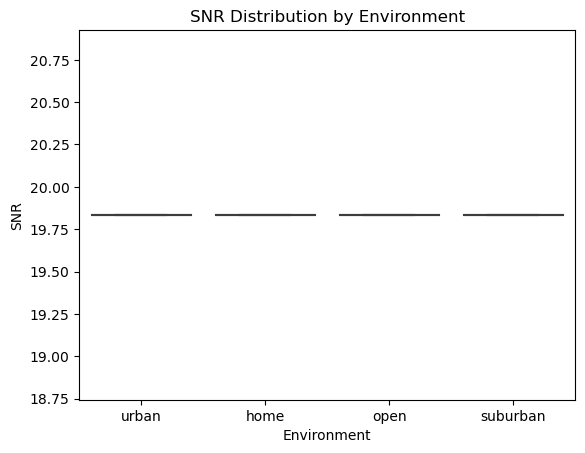

In [25]:
#Exploratory Data Analysis (EDA)
#Signal Strength vs Distance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Distance to Tower (km)'], y=data['Signal Strength (dBm)'], hue=data['Environment'])
plt.title('Signal Strength vs Distance to Tower')
plt.xlabel('Distance to Tower (km)')
plt.ylabel('Signal Strength (dBm)')
plt.show()

#SNR Across Environments

sns.boxplot(x=data['Environment'], y=data['SNR'])
plt.title('SNR Distribution by Environment')
plt.show()


# Feature Engineering
1. Extract hour and day from the timestamp for temporal analysis.
2. Create a new feature: Signal Quality based on Signal Strength and SNR.

In [26]:
#Feature Engineering
# Convert Timestamp to datetime and extract new features
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data['Hour'] = data['Timestamp'].dt.hour
data['Day'] = data['Timestamp'].dt.day

# Derive Signal Quality
data['Signal Quality'] = data['Signal Strength (dBm)'] + data['SNR']

from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Apply to columns
data['Environment'] = le.fit_transform(data['Environment'])
data['Call Type'] = le.fit_transform(data['Call Type'])
data['Incoming/Outgoing'] = le.fit_transform(data['Incoming/Outgoing'])

print(data)

              Timestamp  Signal Strength (dBm)        SNR  Call Duration (s)  \
0   2022-01-03 17:46:13             -84.119763  19.834262        1713.800550   
1   2022-01-04 17:29:31             -87.806131  19.834262         345.371848   
2   2022-01-05 17:14:01            -116.575176  19.834262         259.285043   
3   2022-01-06 16:02:29             -82.961183  19.834262         357.974004   
4   2022-01-07 22:19:17             -85.012574  19.834262         398.006716   
..                  ...                    ...        ...                ...   
458 2022-04-05 10:16:11             -77.606140  19.834262         327.551183   
459 2022-04-06 14:43:53            -110.548728  19.834262        1503.636459   
460 2022-04-07 17:08:49            -108.254563  19.834262        1761.584061   
461 2022-04-08 16:01:41             -99.218386  19.834262         355.301551   
462 2022-04-09 22:47:01             -65.124403  19.834262         145.280367   

     Environment  Attenuation  Distance

# Build Predictive Model
## Objective: Predict Signal Strength (dBm) based on other features.

# Random Forest
Handles both categorical and numerical features effectively, is robust to outliers, and provides feature importance.

In [27]:
#Build Predictive Model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Select features and target
features = ['Distance to Tower (km)', 'SNR', 'Attenuation']
X = data[features]
y = data['Signal Strength (dBm)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 233.9698846964681


# Deliverables
1. Cleaned and analyzed dataset.
2. Predictive model for signal strength.
3. Recommendations for network optimization.
4. Interactive dashboard.